## Probabililty Distributions and Hypothesis Tests (t-test)

### Random Variable
Random variable is a variable quantity whose value is subject to variations due to chance (i.e. randomness). A random variable can take on a set of possible different values (similarly to other mathematical variables), each with an associated probability [wiki](https://en.wikipedia.org/wiki/Random_variable)
    
### Probability Distribution
Assigns a probability to each measurable subset of the possible outcomes of a random experiment, survey, or procedure of statistical inference. [wiki](https://en.wikipedia.org/wiki/Probability_distribution)

#### Probability Density Function
function that describes the relative likelihood for this random variable to take on a given value

### Central Limit Theorem
Given certain conditions, the arithmetic mean of a sufficiently large number of iterates of independent random variables, each with a well-defined expected value and well-defined variance, will be approximately normally distributed, regardless of the underlying distribution. [wiki](https://en.wikipedia.org/wiki/Central_limit_theorem)

#### Normal Distribution
A bell shaped distribution. It is also called Gaussian distribution

<img style="float: left;" src="img/normaldist.png" height="220" width="220">
<br>
<br>
<br>
<br>



**PDF**
<br>
<br>
<img style="float: left;" src="img/normal_pdf.png" height="320" width="320">
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

#### Mean/Median/Mode

#### Variance

It's the average distance of the data values from the *mean*

<img style="float: left;" src="img/variance.png" height="320" width="320">
<br>
<br>
<br>
<br>

#### Standard Deviation
It is the square root of variance. This will have the same units as the data and mean.
In [19]:


#### Skewness
Measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. [wiki](https://en.wikipedia.org/wiki/Skewness)

<img style="float: left;" src="img/skewness.png" height="620" width="620">
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>


#### Binomial Distribution

Binomial distribution with parameters `n` and `p` is the discrete probability distribution of the number of successes in a sequence of n independent yes/no experiments, each of which yields success with probability p. A success/failure experiment is also called a Bernoulli experiment or Bernoulli trial; when n = 1, the binomial distribution is a Bernoulli distribution  [wiki](https://en.wikipedia.org/wiki/Binomial_distribution)
<br>
<br>
<img style="float: left;" src="img/binomial_pmf.png" height="420" width="420">
<br>
<br>
<br>

#### Uniform distribution
All values have the same frequency [wiki](https://en.wikipedia.org/wiki/Uniform_distribution_(continuous))


<br> 
<br>
<img style="float: left;" src="img/uniform.png" height="420" width="420">
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

### Histograms
Histograms are commonly used representation for a distribution.

Below we compare the distributions of head counts out of 500 coin tossing between two experiments using two different coins (showing heads with probability of 0.5 and 0.6, respectively), and each experiment has been repeated 100 times.

(100,)
[260 232 259 226 249 255 236 262 228]
[302 307 298 309 294 280 286 316 312]
Exp1: mean 250.530, variance 144.589
Exp2: mean 300.620, variance 92.236


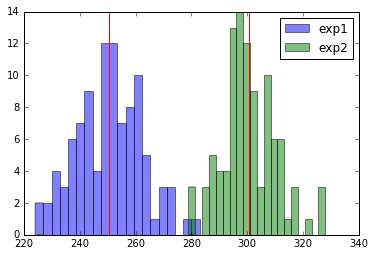

In [1]:
%matplotlib inline  

import numpy as np
from scipy.stats import stats
import matplotlib.pyplot as plt  

# Use generating random numbers from binomial distributions 
heads_exp1 = np.random.binomial(n=500, p=.50, size=100)
heads_exp2 = np.random.binomial(n=500, p=.60, size=100)

print(heads_exp1.shape)
print(heads_exp1[1:10])
print(heads_exp2[1:10])

m1 = heads_exp1.mean()
m2 = heads_exp2.mean()
var1 = heads_exp1.var()
var2 = heads_exp2.var()
print("Exp1: mean %0.3f, variance %0.3f" %(m1, var1))
print("Exp2: mean %0.3f, variance %0.3f" %(m2, var2))

plt.hist(heads_exp1, bins=20, alpha=0.5, label='exp1')
plt.hist(heads_exp2, bins=20, alpha=0.5, label='exp2')
plt.legend(loc='upper right')
plt.axvline(x=m1, color='r')
plt.axvline(x=m2, color='r')

plt.show()


## Hypothesis Testing
We would like to know if the effects we see in the sample(observed data) are likely to occur in the population.
The way classical hypothesis testing works is by conducting a statistical test to answer the following question:
Given the sample and an effect, what is the probability of seeing that effect just by chance?
Here are the steps on how we would do this
- Compute test statistic
- Define null hypothesis (assume the effect is false or seen by chance)
- Compute p-value (to estimate the probability of seeing that effect by chance)
- Interpret the result

If p-value is very low (most often, below 0.05), the effect is considered statistically significant. That means that effect is unlikely to have occured by chance. The inference? The effect is likely to be seen in the population too.

This process is very similar to the proof by contradiction paradigm. We first assume that the effect is false. That's the null hypothesis. Next step is to compute the probability of obtaining that effect (the p-value). If p-value is very low(< 0.05 as a rule of thumb), we reject the null hypothesis.

Now get back to the coin tossing experiment. We are interested in comparing the rate of heads for the two different coins. We could then compute the difference in the mean of rate of heads. 

### Question: is the rate of heads higher for the second coin than for the first one?
- How can we tell the difference is significant (i.e. not due to random fluctuation of the experimentation)?

- what kind of distribution we could expect for the rate of heads for each individual coin? How to visualise it? 

In [2]:
# Note the effect of dividing using integers only
pheads_exp1 = heads_exp1/500.0; 
pheads_exp2 = heads_exp2/500.0; 

print pheads_exp1[1:10]
print pheads_exp2[1:10]

m1 = pheads_exp1.mean()
m2 = pheads_exp2.mean()
std1 = pheads_exp1.std()
std2 = pheads_exp2.std()
print("Exp1: mean %0.3f, sd %0.3f" %(m1, std1))
print("Exp2: mean %0.3f, sd %0.3f" %(m2, std2))

# Now compute the mean of the rate of heads
diffm = m1 - m2
print("Diff in rate of heads %0.3f" %diffm)

[ 0.52   0.464  0.518  0.452  0.498  0.51   0.472  0.524  0.456]
[ 0.604  0.614  0.596  0.618  0.588  0.56   0.572  0.632  0.624]
Exp1: mean 0.501, sd 0.024
Exp2: mean 0.601, sd 0.019
Diff in rate of heads -0.100


### Use hypothesis test
to check if the difference in mean is significantly different from 0 or not.

> ***Distribution of the rate of heads*** 
We can approximate the distribution of the rate of heads with ***normal distribution*** (see central limit theorem) 

>*** Null Hypothesis***: Mean rate of heads aren't significantly different

>*** Perform t-test*** and determine the p-value.

In [3]:
stats.ttest_ind(pheads_exp1, pheads_exp2, equal_var=False)

Ttest_indResult(statistic=-32.385837399506919, pvalue=5.2263786690529487e-79)

p-value is the probability of seeing the effect by chance. And here, p-value is almost 0.

*Conclusion*: The mean difference in rate of heads is significant. The rate of heads for first coin is higher than the second by 0.1.

### Question: to check if the first coin is biased
Use one-sample t-test (stats.ttest) to check if the rate of heads are significantly different from 0.5 or not.

In [4]:
t_statistic, p_value = stats.ttest_1samp(pheads_exp1, 0.5)
print("t_statistic = %.4f, p_value = %.4f" %(t_statistic, p_value) )

t_statistic = 0.4386, p_value = 0.6619


### Application of t-tests

#### Assumption of t-test

One assumption is that the data used came from a normal distribution. 
<br>
There are various tests (e.g. [Shapiro-Wilk test] https://en.wikipedia.org/wiki/Shapiro-Wilk) to test for normality. If p-value is less than 0.05, then there's a low chance that the distribution is normal. 

However in practice t-tests work still fine when the normality assumption is violated, as long as the distribution is not too skewed.  

#### One-sample t-tests vs two sample t-tests
In the above example we have done two-sample t-test using two independent samples.
However one sample t-tests are also available to test if the mean of a sample is equal to a certain value or not. 

### Comparison of the model performance using t-tests
Quite often we evaluate our model performance using mulitple random samples (e.g. from cross-validation) and result into a sample of performance measure (e.g. accuracy, sensitivity, specificity). We can then use t-tests to compare the performance of two different models, if the two types of models were trained and validated using the same sets of data in a paired manner, we could then use paired t-tests to compare the performance. 

### Use t-tests for feature ranking
T-tests could be use to test the association between a continuous variable and a binary variable (e.g. with a target variable class + and -, i.e. two different populations)
T-tests are equivalent to one-way ANOVA (Analysis of Variance) when the categorical variable is binary and under the assumpation of equal variances. Whilst one-way ANOVA could be used to check the association between the continuous variable to the categorical variable of more than two categories.

#### Question: Which of these give smaller p-values ? 
Smaller effect size (e.g. mean difference between samples / groups)
Smaller standard deviation
Smaller sample size
Higher variance

Answer:

#### Question: how to select/rank feture based on t-tests (in case of binary target variables)? 
Which the following could be useful?
- Filter out features with p-values greater than certain threshold (e.g. 0.1)
- Rank the features increasingly with p-values (the smaller the p-value, the more important the features). 


### Chi-Squared tests
Chi-Square tests are used when the data are frequencies, rather than numerical score/price.

The following two tests make use of chi-square statistic

1. chi-square test for goodness of fit
2. chi-square test for independence

Chi-square test is a non-parametric test. They do not require assumptions about population parameters and they do not test hypotheses about population parameters.

### Chi-Square test for goodness fit / for independence
<br>
The chi-squared goodness-of-fit test is an analog of the one-sample t-test for categorical variables: it tests whether the distribution of sample categorical data matches an expected distribution. 

Alternatively, it could be used to test the independence (null hypothesis) between two categorical variables. Therefore the smaller the p-value, the more significant in the association thus could be used for feature selection/ranking.  

<br>
<br>
$$ \chi^2 = \sum (O - E)^2/E $$

* O is observed frequency
* E is expected frequency
* $ \chi $ is the chi-square statistic

In [5]:
#scipy.stats.chisquare(f_obs, f_exp=None, ddof=0, axis=0)[source]
